In [ ]:
# !pip3 install torchvision==0.5.0
# !pip3 install scikit-learn

In [1]:
from __future__ import print_function, division
import datetime
import torch
# backend = "qnnpack"
# torch.backends.quantized.engine = backend
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision.utils import save_image
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
import copy
import cv2

/home/countai/playground/ml/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for a,b in enumerate(os.listdir("data/deepdata")):
    print(a,b)

0 kirchidata-old
1 val
2 kirchidata
3 kirchi_detection_data_versions
4 train-backup
5 train
6 ana


In [3]:
#importing sam
from sam.sam import SAM

In [4]:
class ThreadDataset(Dataset):
    def __init__(self,typ):
#         self.resize = transforms.Resize(25)
#         self.grayscame = transforms.Grayscale(num_output_channels=3)
#         self.randomhflip = transforms.RandomHorizontalFlip()
#         self.tensor = transforms.ToTensor()
#         self.normalise = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        self.samples = []
    
        for id,i in enumerate(os.listdir("data/deepdata/"+typ)):
            for j in os.listdir("data/deepdata/"+typ+"/"+i):
                im_bgr = cv2.imread("data/deepdata/"+typ+"/"+i+"/"+j)
                im_rgb = im_bgr[:, :, ::-1]
                if i == "t":
                    label = 1
                else:
                    label = 0
                self.samples.append((im_rgb,label,"data/deepdata/"+typ+"/"+i+"/"+j))
                print("Image LOC:","data/deepdata/"+typ+"/"+i+"/"+j," Image Label :",label)
#                 print(im_rgb.shape)
            
        self.data_transforms = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize(25,),
                transforms.Grayscale(num_output_channels=3),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
        
        
        
        
    def __getitem__(self, index):
        
        image = self.samples[index][0]
        image = cv2.resize(image,(170,25))
        image = self.data_transforms(image)
        
        return (image,self.samples[index][1],self.samples[index][2])

    def __len__(self):
        return len(self.samples)


threadtrainDataset = ThreadDataset("train")
threadvalDataset = ThreadDataset("val")
# print(threadDataset.__getitem__(1)[0].shape)

Image LOC: data/deepdata/train/t/1601639083.41907.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/4189.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/12003.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/43.65797063679639.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/66.58427677640454.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/1601687429.767784.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/8909.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/40047.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/458.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/63.239593878619225.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/30552.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/1240.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/1601655642.228477.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/43.93214704414361.jpg  Image Label : 1
Image LOC: data/deepdata/train/t/2197.jpg  Image Label : 1
Image LOC: data/deepda

Image LOC: data/deepdata/train/c/1601628478.3506398.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/984828.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601633260.7325792.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/9849458.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/3908783.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/2020-12-28-1609148896.753661-35.64301967964134.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601635563.2021458.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/33052.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/9849409.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/10.938695300050227.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/16282.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/15780.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/98474117.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/3908786.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601625857.4169292.jpg

Image LOC: data/deepdata/train/c/1601634979.4754913.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/16395.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/16149.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/19443.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/31231.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601632426.7678816.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/439922.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601631854.564782.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/52.83608293761029.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/21004.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/19447.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601632718.6226656.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/42.410393222512944.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/16358.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/3908784.jpg  Image Label : 0
Image LOC: data/deepd

Image LOC: data/deepdata/train/c/19471.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601625305.95867.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/16294.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601624107.131479.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/137.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/15709.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/56.17066586592243.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/8.599942198332622.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/2020-12-28-1609148896.753661-27.498068022835874.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/1601628361.2516198.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/32022.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/30600.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/61.51272562691453.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/15735.jpg  Image Label : 0
Image LOC: data/deepdata/train/c/804.jpg  Image 

Image LOC: data/deepdata/val/c/10501.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21334.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/22156.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/88.84119147813793.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/31342.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21513.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21442.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21398.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10479.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/22135.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10441.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21358.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10786.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10130.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/1601614903.1819587.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10668.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10105.jpg  Image

Image LOC: data/deepdata/val/c/98473997.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10154.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10367.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/98474113.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10137.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/32112.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21453.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10528.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/98474089.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10396.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/90.89122716853618.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/16246.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/10327.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/21108.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/31366.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/984793.jpg  Image Label : 0
Image LOC: data/deepdata/val/c/20016.jpg  Image La

In [5]:
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize(25),
#         transforms.Grayscale(num_output_channels=3),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize(25),
#         transforms.Grayscale(num_output_channels=3),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }
# data_dir = 'data/deepdata'
# print(datasets.ImageFolder(os.path.join(data_dir, x)))
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in ['train', 'val']}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
#                                              shuffle=True, num_workers=4)
#               for x in ['train', 'val']}
# dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
# class_names = image_datasets['train'].classes

dataloaders = {"train":torch.utils.data.DataLoader(threadtrainDataset, batch_size=4,
                                             shuffle=True, num_workers=4),
               "val":torch.utils.data.DataLoader(threadvalDataset, batch_size=4,
                                             shuffle=True, num_workers=4)
              }

dataset_sizes = {"train":len(threadtrainDataset), "val":len(threadvalDataset) }

# print(dataloaders)
class_names = ["c","t"]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cuda"
print("device",device)
# device = "cpu"

device cuda


tensor([0, 0, 0, 1])


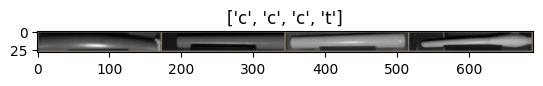

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes,path = next(iter(dataloaders['train']))
print(classes)
# # Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [7]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

#     best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for (inputs, labels,paths) in dataloaders[phase]:
#                 print("length of data",inputs.shape)
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
#                         loss.requires_grad = True
                        loss.backward()
                        optimizer.step()
#                         def closure():
#                             outputs = model(inputs)
#                             _, preds = torch.max(outputs, 1)
#                             loss = criterion(outputs, labels)
#                             loss.backward()
#                             return loss
                
#                         optimizer.step(closure)

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [8]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels,paths) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            print(datetime.datetime.now())
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(datetime.datetime.now())
            print(preds)
#             if 1 not in preds:
#                 continue
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [9]:
# model_ft = models.quantization.resnet18(pretrained=True)
# model_ft

In [10]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/home/countai/playground/ml/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/countai/playground/ml/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# # model_ft = models.quantization.resnet18(pretrained=True)
# model_ft = models.quantization.mobilenet_v3_large(pretrained=True,quantize=True)
# num_ftrs = model_ft.classifier[3].in_features 
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
# model_ft.classifier[3].in_features = nn.Linear(num_ftrs, 2)

# model_ft = model_ft.to(device)

# criterion = nn.CrossEntropyLoss()

# # Observe that all parameters are being optimized
# # optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
# optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)


# # base_optimizer = optim.SGD 
# # optimizer_ft = SAM(model_ft.parameters(), base_optimizer, lr=0.001, momentum=0.9)


# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [12]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6159 Acc: 0.7009
val Loss: 1.2296 Acc: 0.5886

Epoch 1/9
----------
train Loss: 0.4464 Acc: 0.8110
val Loss: 0.6230 Acc: 0.6922

Epoch 2/9
----------
train Loss: 0.3092 Acc: 0.8861
val Loss: 0.3971 Acc: 0.8281

Epoch 3/9
----------
train Loss: 0.2443 Acc: 0.9123
val Loss: 0.4640 Acc: 0.7835

Epoch 4/9
----------
train Loss: 0.2035 Acc: 0.9290
val Loss: 0.1641 Acc: 0.9476

Epoch 5/9
----------
train Loss: 0.1712 Acc: 0.9428
val Loss: 0.4606 Acc: 0.7713

Epoch 6/9
----------
train Loss: 0.1591 Acc: 0.9449
val Loss: 0.2558 Acc: 0.8917

Epoch 7/9
----------
train Loss: 0.1002 Acc: 0.9647
val Loss: 0.1322 Acc: 0.9618

Epoch 8/9
----------
train Loss: 0.0783 Acc: 0.9727
val Loss: 0.1277 Acc: 0.9618

Epoch 9/9
----------
train Loss: 0.0684 Acc: 0.9788
val Loss: 0.1198 Acc: 0.9662

Training complete in 4m 21s
Best val Acc: 0.966171


In [13]:
# mobilenet_model = models.mobilenet_v2(pretrained=True)
# # print(mobilenet_model)
# num_ftrs = mobilenet_model.classifier[1].in_features
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
# mobilenet_model.classifier[1] = nn.Linear(num_ftrs, 2)

# mobilenet_model = mobilenet_model.to(device)

# criterion = nn.CrossEntropyLoss()

# # Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [14]:
# model_ft = train_model(mobilenet_model, criterion, optimizer_ft, exp_lr_scheduler,
#                        num_epochs=25)

In [15]:
# !pip3 install efficientnet_pytorch

In [16]:
# from efficientnet_pytorch import EfficientNet
# efficientnet_model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)







In [17]:

# num_ftrs = efficientnet_model._fc.in_features
# print(num_ftrs)
# efficientnet_model._fc = nn.Linear(num_ftrs, 2)
# print(efficientnet_model)
# efficientnet_model = efficientnet_model.to(device)


In [18]:
# efficientnet_model = train_model(efficientnet_model, criterion, optimizer_ft, exp_lr_scheduler,
#                        num_epochs=30)

In [19]:
print(device)

cuda


2023-07-21 13:19:35.854162
2023-07-21 13:19:35.857625
tensor([0, 0, 0, 0], device='cuda:0')


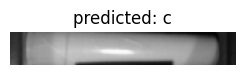

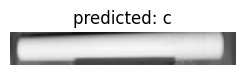

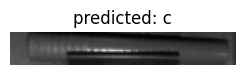

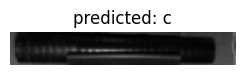

In [20]:
import datetime

# model_ft = model_ft.to("cpu")

visualize_model(model_ft,4)

plt.ioff()
plt.show()

In [21]:
# !pip3 install scikit-learn

In [22]:
# model_ft = model_ft.cpu()

In [23]:
# backend = "qnnpack"
# model_ft.qconfig = torch.quantization.get_default_qconfig(backend)
# torch.backends.quantized.engine = backend
# model_ft = torch.quantization.prepare(model_ft, inplace=False)
# model_ft = torch.quantization.convert(model_ft, inplace=False)

In [24]:
import time
groundTruth = []
prediction = []
# device= "cpu"
was_training = model_ft.training
model_ft = model_ft.to(device)
model_ft.eval()
# print(model_ft.training)
with torch.no_grad():
    for i, (inputs, labels,paths) in enumerate(dataloaders['val']):
        inputs = inputs.to(device)
        labels = labels.to(device)
#         print(inputs.shape)
#         print(labels)
        print(paths)
        print(time.time())
    
#         outputs = model_ft(inputs[0].unsqueeze(0))
        outputs = model_ft(inputs)

    
#         print(outputs)
        _, preds = torch.max(outputs, 1)
#         print(preds)
        print(time.time())
#         breakpoint()
        for i,val in enumerate(preds):
            if val != labels[i]:
    #             plt.savefig("./deepdata/ana/"+str(time.time())+".jpg")
    #             print(inputs[0].cpu().data[0].shape)
#                 save_image(inputs.cpu().data[i], "./data/deepdata/ana/-"+str(labels[i])+"-"+str(val)+str(time.time())+".jpg")
                ima = cv2.imread(paths[i])
                cv2.imwrite("./data/deepdata/ana/-"+str(labels[i])+"-"+str(val)+str(time.time())+".jpg",ima)
#             imshow(inputs.cpu().data[0])
#             break
#             cv2.imwrite("./deepdata/ana/"+str(time.time())+".jpg",inputs[0].cpu().data[0].numpy())
#             inputs.save("./deepdata/ana/"+str(time.time())+".jpg")
#         print(time.time())
#         break
#         print(preds)
        prediction.extend(preds.cpu().numpy())
        groundTruth.extend(labels.cpu().numpy())
    
model_ft.train(mode = True)
print("done------------>")

('data/deepdata/val/c/36039.jpg', 'data/deepdata/val/c/10321.jpg', 'data/deepdata/val/c/21610.jpg', 'data/deepdata/val/t/20842265.jpg')
1689925776.221721
1689925776.224988
('data/deepdata/val/c/28507.jpg', 'data/deepdata/val/c/10564.jpg', 'data/deepdata/val/t/208421526.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-96.18054304689413.jpg')
1689925776.2261758
1689925776.2279952
('data/deepdata/val/c/21038.jpg', 'data/deepdata/val/c/21364.jpg', 'data/deepdata/val/t/208424095.jpg', 'data/deepdata/val/c/10653.jpg')
1689925776.2304766
1689925776.2321877
('data/deepdata/val/t/21086.jpg', 'data/deepdata/val/c/21498.jpg', 'data/deepdata/val/c/36038.jpg', 'data/deepdata/val/c/36041.jpg')
1689925776.2329106
1689925776.2344882
('data/deepdata/val/c/10516.jpg', 'data/deepdata/val/t/14774.jpg', 'data/deepdata/val/t/2084286.32643293406886.jpg', 'data/deepdata/val/c/21174.jpg')
1689925776.2352629
1689925776.2368612
('data/deepdata/val/c/10522.jpg', 'data/deepdata/val/c/89.37134102216324

1689925776.4237192
('data/deepdata/val/c/10144.jpg', 'data/deepdata/val/c/8754846.jpg', 'data/deepdata/val/t/208422.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-99.0190312357312.jpg')
1689925776.4250548
1689925776.4268854
('data/deepdata/val/c/10081.jpg', 'data/deepdata/val/c/10254.jpg', 'data/deepdata/val/t/17859.jpg', 'data/deepdata/val/c/10191.jpg')
1689925776.4280753
1689925776.4298487
('data/deepdata/val/c/20056.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-81.04641320442707.jpg', 'data/deepdata/val/t/208422522.jpg', 'data/deepdata/val/c/10259.jpg')
1689925776.431159
1689925776.4333591
('data/deepdata/val/t/2084282.54918851481357.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-78.61579025906434.jpg', 'data/deepdata/val/c/16004.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-78.45890934723833.jpg')
1689925776.4348922
1689925776.4367054
('data/deepdata/val/c/2020-12-28-1609148896.753661-84.92223583083657.jpg', 'data/deepdata/val/c/10021.jpg', 'da

('data/deepdata/val/c/21553.jpg', 'data/deepdata/val/c/15753.jpg', 'data/deepdata/val/t/21054.jpg', 'data/deepdata/val/c/10263.jpg')
1689925776.6253233
1689925776.6271737
('data/deepdata/val/c/21444.jpg', 'data/deepdata/val/t/208421773.jpg', 'data/deepdata/val/t/2084294.94000535144593.jpg', 'data/deepdata/val/c/10836.jpg')
1689925776.6284876
1689925776.6301808
('data/deepdata/val/t/21083.jpg', 'data/deepdata/val/c/10420.jpg', 'data/deepdata/val/t/20842434.jpg', 'data/deepdata/val/c/21274.jpg')
1689925776.6316495
1689925776.633746
('data/deepdata/val/c/31336.jpg', 'data/deepdata/val/c/10282.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-99.86903057334672.jpg', 'data/deepdata/val/c/21240.jpg')
1689925776.634786
1689925776.636539
('data/deepdata/val/t/2084281.3104230771005.jpg', 'data/deepdata/val/c/10779.jpg', 'data/deepdata/val/t/100008.jpg', 'data/deepdata/val/t/2084288.4682205406879.jpg')
1689925776.6378753
1689925776.639606
('data/deepdata/val/t/20842803.jpg', 'data/de

1689925776.8268888
('data/deepdata/val/c/21071.jpg', 'data/deepdata/val/t/208421081.jpg', 'data/deepdata/val/c/10492.jpg', 'data/deepdata/val/t/20842674.jpg')
1689925776.8281121
1689925776.82997
('data/deepdata/val/c/10334.jpg', 'data/deepdata/val/t/2084245.jpg', 'data/deepdata/val/t/2084289.7978396187472.jpg', 'data/deepdata/val/t/20842546.jpg')
1689925776.8312008
1689925776.8330877
('data/deepdata/val/c/21616.jpg', 'data/deepdata/val/c/15810.jpg', 'data/deepdata/val/c/21631.jpg', 'data/deepdata/val/c/31345.jpg')
1689925776.8350556
1689925776.8368556
('data/deepdata/val/c/88.85653803509015.jpg', 'data/deepdata/val/t/15727.jpg', 'data/deepdata/val/t/2084287.68433816525307.jpg', 'data/deepdata/val/t/208423440.jpg')
1689925776.8382454
1689925776.840078
('data/deepdata/val/t/208421335.jpg', 'data/deepdata/val/t/21073.jpg', 'data/deepdata/val/c/10172.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-98.79560535535556.jpg')
1689925776.8419936
1689925776.8442202
('data/deepdata/v

('data/deepdata/val/t/15694.jpg', 'data/deepdata/val/c/21275.jpg', 'data/deepdata/val/c/10389.jpg', 'data/deepdata/val/c/10059.jpg')
1689925777.0282137
1689925777.0301347
('data/deepdata/val/c/32122.jpg', 'data/deepdata/val/c/10182.jpg', 'data/deepdata/val/c/98474036.jpg', 'data/deepdata/val/t/208423919.jpg')
1689925777.0313876
1689925777.033142
('data/deepdata/val/c/98473957.jpg', 'data/deepdata/val/c/10452.jpg', 'data/deepdata/val/t/21059.jpg', 'data/deepdata/val/t/100002.jpg')
1689925777.034544
1689925777.036742
('data/deepdata/val/c/10803.jpg', 'data/deepdata/val/t/28518.jpg', 'data/deepdata/val/c/10347.jpg', 'data/deepdata/val/t/208424774.jpg')
1689925777.0378082
1689925777.0395303
('data/deepdata/val/c/10630.jpg', 'data/deepdata/val/t/208423932.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-85.74736564234983.jpg', 'data/deepdata/val/c/10725.jpg')
1689925777.040727
1689925777.0424838
('data/deepdata/val/c/31337.jpg', 'data/deepdata/val/t/20842978.jpg', 'data/deepdat

1689925777.2294886
('data/deepdata/val/t/28513.jpg', 'data/deepdata/val/t/2084299.224952197593.jpg', 'data/deepdata/val/c/1601614809.641678.jpg', 'data/deepdata/val/c/21134.jpg')
1689925777.2308576
1689925777.2327147
('data/deepdata/val/c/21019.jpg', 'data/deepdata/val/c/1601614678.9756567.jpg', 'data/deepdata/val/c/21590.jpg', 'data/deepdata/val/c/28033.jpg')
1689925777.2339125
1689925777.2356608
('data/deepdata/val/t/21079.jpg', 'data/deepdata/val/t/208422861.jpg', 'data/deepdata/val/c/10572.jpg', 'data/deepdata/val/c/23052.jpg')
1689925777.2374394
1689925777.2393937
('data/deepdata/val/c/16226.jpg', 'data/deepdata/val/t/208421385.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-83.20892645091455.jpg', 'data/deepdata/val/t/100009.jpg')
1689925777.2406642
1689925777.242519
('data/deepdata/val/t/208423911.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-90.7499645025155.jpg', 'data/deepdata/val/c/1601613786.4313867.jpg', 'data/deepdata/val/t/15675.jpg')
1689925777.2439501

1689925777.4304614
('data/deepdata/val/c/8944.jpg', 'data/deepdata/val/c/984880.jpg', 'data/deepdata/val/c/10060.jpg', 'data/deepdata/val/t/208424078.jpg')
1689925777.4315362
1689925777.4333227
('data/deepdata/val/t/208422020-12-28-1609149180.6135726-86.02396075604413.jpg', 'data/deepdata/val/c/10119.jpg', 'data/deepdata/val/c/10236.jpg', 'data/deepdata/val/t/208421576.jpg')
1689925777.4345095
1689925777.4362304
('data/deepdata/val/c/10668.jpg', 'data/deepdata/val/c/96.16176432262465.jpg', 'data/deepdata/val/t/20842541.jpg', 'data/deepdata/val/c/10854.jpg')
1689925777.4387143
1689925777.4412467
('data/deepdata/val/t/208423374.jpg', 'data/deepdata/val/t/2084287.82968180799045.jpg', 'data/deepdata/val/c/21052.jpg', 'data/deepdata/val/t/208421504.jpg')
1689925777.4429936
1689925777.4454787
('data/deepdata/val/t/208422020-12-28-1609149180.6135726-97.21810904149154.jpg', 'data/deepdata/val/c/984887.jpg', 'data/deepdata/val/c/10713.jpg', 'data/deepdata/val/c/21282.jpg')
1689925777.4468982
16

1689925777.6316636
('data/deepdata/val/c/21537.jpg', 'data/deepdata/val/c/31340.jpg', 'data/deepdata/val/c/28006.jpg', 'data/deepdata/val/c/1601615061.9133136.jpg')
1689925777.6332211
1689925777.6349404
('data/deepdata/val/t/208422316.jpg', 'data/deepdata/val/t/2084284.32262078735987.jpg', 'data/deepdata/val/c/20058.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-82.9583684479001.jpg')
1689925777.6361547
1689925777.6380093
('data/deepdata/val/c/1601612283.7080448.jpg', 'data/deepdata/val/c/10749.jpg', 'data/deepdata/val/c/10087.jpg', 'data/deepdata/val/c/10474.jpg')
1689925777.640735
1689925777.6428945
('data/deepdata/val/c/21318.jpg', 'data/deepdata/val/c/8754839.jpg', 'data/deepdata/val/t/208424823.jpg', 'data/deepdata/val/c/22158.jpg')
1689925777.6447556
1689925777.6469254
('data/deepdata/val/c/22160.jpg', 'data/deepdata/val/c/10381.jpg', 'data/deepdata/val/c/16151.jpg', 'data/deepdata/val/c/10844.jpg')
1689925777.648648
1689925777.6504676
('data/deepdata/val/c/16060.j

1689925777.8328934
('data/deepdata/val/c/10221.jpg', 'data/deepdata/val/t/2084283.04564344366554.jpg', 'data/deepdata/val/t/208422376.jpg', 'data/deepdata/val/t/20842416.jpg')
1689925777.8341167
1689925777.8358874
('data/deepdata/val/c/10165.jpg', 'data/deepdata/val/c/10465.jpg', 'data/deepdata/val/t/2084287.99790337466679.jpg', 'data/deepdata/val/t/2084280.6526449787298.jpg')
1689925777.8370652
1689925777.8388655
('data/deepdata/val/c/10615.jpg', 'data/deepdata/val/c/10672.jpg', 'data/deepdata/val/c/15932.jpg', 'data/deepdata/val/c/10670.jpg')
1689925777.840609
1689925777.8429909
('data/deepdata/val/c/16191.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-85.66294825000837.jpg', 'data/deepdata/val/c/10784.jpg', 'data/deepdata/val/c/21085.jpg')
1689925777.8446703
1689925777.8469121
('data/deepdata/val/t/20842996.jpg', 'data/deepdata/val/c/20030.jpg', 'data/deepdata/val/c/1601612251.660519.jpg', 'data/deepdata/val/c/21431.jpg')
1689925777.8486702
1689925777.8505366
('data/d

1689925778.0336623
('data/deepdata/val/t/2084290.82984894821647.jpg', 'data/deepdata/val/c/21256.jpg', 'data/deepdata/val/c/21280.jpg', 'data/deepdata/val/c/28505.jpg')
1689925778.034638
1689925778.036375
('data/deepdata/val/c/31329.jpg', 'data/deepdata/val/c/21458.jpg', 'data/deepdata/val/t/17812.jpg', 'data/deepdata/val/t/208424899.jpg')
1689925778.0376124
1689925778.0393343
('data/deepdata/val/c/16303.jpg', 'data/deepdata/val/c/31355.jpg', 'data/deepdata/val/t/208422020-12-28-1609149180.6135726-80.58961185707525.jpg', 'data/deepdata/val/t/22957.jpg')
1689925778.0414762
1689925778.043637
('data/deepdata/val/c/10794.jpg', 'data/deepdata/val/c/10661.jpg', 'data/deepdata/val/c/10839.jpg', 'data/deepdata/val/c/10467.jpg')
1689925778.0450547
1689925778.0471277
('data/deepdata/val/c/10215.jpg', 'data/deepdata/val/c/10659.jpg', 'data/deepdata/val/t/2084289.88948057309263.jpg', 'data/deepdata/val/t/20842999.jpg')
1689925778.0488565
1689925778.0509374
('data/deepdata/val/c/10815.jpg', 'data/d

('data/deepdata/val/t/208421340.jpg', 'data/deepdata/val/c/21490.jpg', 'data/deepdata/val/c/10511.jpg', 'data/deepdata/val/t/208424827.jpg')
1689925778.2349048
1689925778.2368374
('data/deepdata/val/t/21076.jpg', 'data/deepdata/val/c/10131.jpg', 'data/deepdata/val/c/10495.jpg', 'data/deepdata/val/c/15794.jpg')
1689925778.238065
1689925778.2397914
('data/deepdata/val/c/10372.jpg', 'data/deepdata/val/c/20010.jpg', 'data/deepdata/val/c/36040.jpg', 'data/deepdata/val/c/10024.jpg')
1689925778.2411036
1689925778.2436426
('data/deepdata/val/c/10148.jpg', 'data/deepdata/val/c/10667.jpg', 'data/deepdata/val/t/208422633.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-87.04092195337196.jpg')
1689925778.246156
1689925778.2487683
('data/deepdata/val/c/10375.jpg', 'data/deepdata/val/t/208424791.jpg', 'data/deepdata/val/c/1601615350.1791823.jpg', 'data/deepdata/val/t/100001.jpg')
1689925778.250131
1689925778.2519405
('data/deepdata/val/c/8754841.jpg', 'data/deepdata/val/c/2020-12-28-160914889

('data/deepdata/val/t/208423827.jpg', 'data/deepdata/val/c/21028.jpg', 'data/deepdata/val/c/10568.jpg', 'data/deepdata/val/t/208423545.jpg')
1689925778.4366817
1689925778.4384432
('data/deepdata/val/c/10300.jpg', 'data/deepdata/val/c/1601612075.4430232.jpg', 'data/deepdata/val/c/10188.jpg', 'data/deepdata/val/c/10578.jpg')
1689925778.4398205
1689925778.441465
('data/deepdata/val/c/21404.jpg', 'data/deepdata/val/c/20054.jpg', 'data/deepdata/val/c/21620.jpg', 'data/deepdata/val/c/21087.jpg')
1689925778.4427567
1689925778.44493
('data/deepdata/val/t/20842427.jpg', 'data/deepdata/val/c/10312.jpg', 'data/deepdata/val/c/98473944.jpg', 'data/deepdata/val/c/2020-12-28-1609148896.753661-96.66514119153662.jpg')
1689925778.446252
1689925778.4482293
('data/deepdata/val/c/10145.jpg', 'data/deepdata/val/t/208421315.jpg', 'data/deepdata/val/t/208423796.jpg', 'data/deepdata/val/c/10179.jpg')
1689925778.4497766
1689925778.4518843
('data/deepdata/val/c/10324.jpg', 'data/deepdata/val/c/10691.jpg', 'data/

In [25]:
print(groundTruth)

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 

In [26]:
print(prediction)

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(groundTruth, prediction)

array([[2030,   48],
       [  52,  826]])

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(groundTruth, prediction)

0.9450800915331807

In [29]:
recall_score(groundTruth, prediction)

0.9407744874715261

In [30]:
from sklearn.metrics import f1_score
f1_score(groundTruth, prediction)

0.9429223744292236

In [31]:
#saving the model
torch.save(model_ft.state_dict(),"kirchi_model.pth")

In [32]:
class_names

['c', 't']

In [ ]:
model_ft = models.resnet18(pretrained = False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)
model_ft.load_state_dict(torch.load("./kirchi_model.pth"))
model_ft = model_ft.to("cuda")

In [ ]:
model_ft